In [45]:
import argparse
import requests
import pandas as pd
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import sklearn
from ast import literal_eval

import warnings
warnings.filterwarnings("ignore")

In [46]:
#from src.tmdb_frame import tmdb_frame
from src.tmdb_model import tmdb_model
from src.tmdb_linreg import tmdb_linreg

In [ ]:
data = pd.read_csv('3A_data-output.csv', index_col=0)

#### Interactions

In [ ]:
seasons = ['is_spring',
       'is_summer', 'is_fall', 'is_holiday']

months = ['is_jan', 'is_feb', 'is_mar',
       'is_apr', 'is_may', 'is_jun', 'is_jul', 'is_aug', 'is_sep', 'is_oct',
       'is_nov', 'is_dec']

genres = ['is_adventure', 'is_fantasy', 'is_animation',
       'is_drama', 'is_horror', 'is_action', 'is_comedy', 'is_history',
       'is_western', 'is_thriller', 'is_crime', 'is_documentary', 'is_sci_fi',
       'is_mystery', 'is_music', 'is_romance', 'is_family',]

In [ ]:
import warnings
warnings.filterwarnings("ignore")

for i in months:
    for j in genres:
        new_column = f'{i}_*_{j}'
        baseline[new_column] = baseline[str(i)] * baseline[str(j)]

In [ ]:
for i in genres:
    for j in genres:
        if i == j:
            continue
        if f'{j}_*_{i}' in baseline:
            continue
        else:
            new_column = f'{i}_*_{j}'
            baseline[new_column] = baseline[str(i)] * baseline[str(j)]

In [49]:
#Drop unnecessary + whatever release date / month / season becomes redundant
X = data.drop(columns = ['id', 'release', 'release_date', 'opening_revenue','origin_country', 'production_companies', 'production_countries'])

In [50]:
result_df = pd.DataFrame()
i = 0
cut = X.columns.to_list()
lim = len(cut) + 1

while i < 400:
    subset = X[cut]
    subset = sm.add_constant(subset)
    Y = pd.DataFrame(np.sqrt(data['opening_revenue']))
    model = sm.OLS(Y, subset)
    results = model.fit()
    rsquared_adj = results.rsquared_adj
    columns = subset.columns.to_list()
    d = pd.DataFrame({'model' : i, 'feature_count' : len(subset.columns), 'adj_rsquared' : rsquared_adj, 'feature_space' : [columns]}, index = [i])
    result_df = pd.concat([result_df, d])
    
    pvals = pd.DataFrame(results.pvalues).sort_values(by = 0, ascending = False).reset_index()
    pvals = pvals[pvals['index'] != 'const']
    cut = pvals['index'].to_list()[1:]
    i = i + 1

result_df.sort_values(by = 'adj_rsquared', ascending = False).reset_index().head(6)

,index,model,feature_count,adj_rsquared,feature_space
0,183,183,209,0.751455,"[const, is_romance_*_is_family, is_aug_*_is_co..."
1,184,184,208,0.751365,"[const, is_may_*_is_animation, is_nov_*_is_fan..."
2,182,182,210,0.751212,"[const, is_comedy_*_is_romance, is_romance_*_i..."
3,185,185,207,0.751178,"[const, is_aug_*_is_history, is_aug_*_is_adven..."
4,178,178,214,0.751163,"[const, is_animation_*_is_comedy, is_jun_*_is_..."
5,179,179,213,0.751074,"[const, is_jun_*_is_music, is_drama_*_is_roman..."


In [51]:
final_cut = result_df.sort_values(by = 'adj_rsquared', ascending = False).reset_index().feature_space[0]
final_cut.remove('const')

                             OLS Regression Results                             
Dep. Variable:     sqrt_opening_revenue   R-squared:                       0.828
Model:                              OLS   Adj. R-squared:                  0.751
Method:                   Least Squares   F-statistic:                     10.78
Date:                  Fri, 25 Oct 2024   Prob (F-statistic):           2.04e-73
Time:                          18:41:46   Log-Likelihood:                -4084.3
No. Observations:                   499   AIC:                             8479.
Df Residuals:                       344   BIC:                             9132.
Df Model:                           154                                         
Covariance Type:              nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

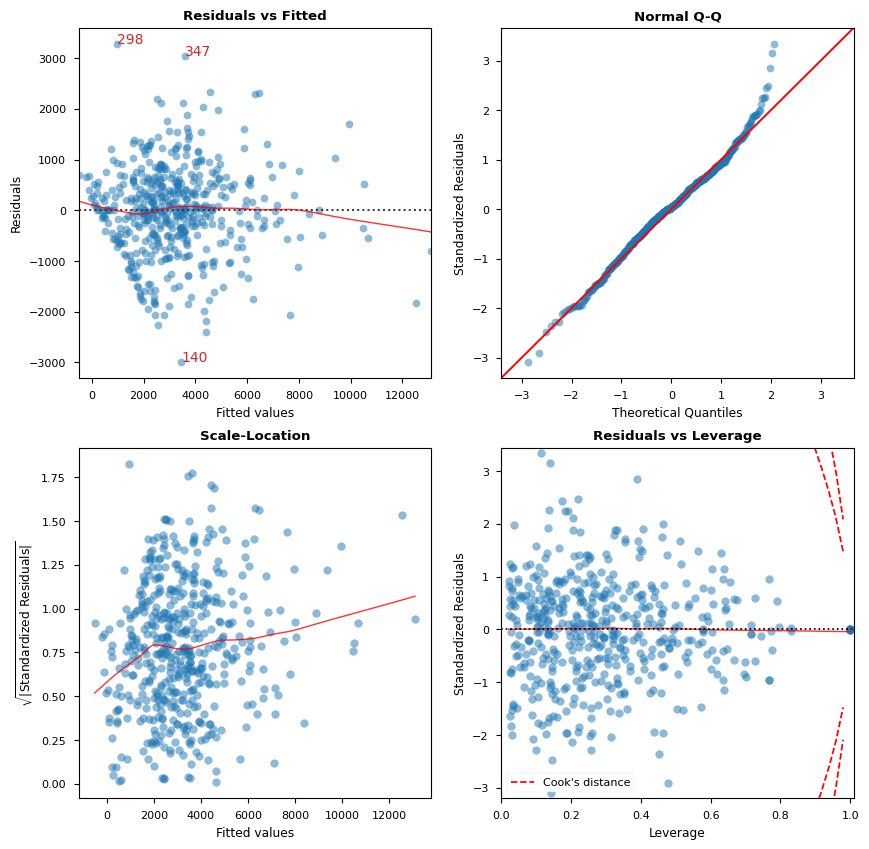

In [52]:
# Initialize TMDB model class.
mdl = tmdb_model()

cdf = data

# Generate pair plot of continuous covariates.
#sns.pairplot(cdf[['opening_revenue', 'budget', 'num_production_companies', 'runtime', 'month', 'pct_indie']])

# Generate OLS model.
Y = ['opening_revenue']
X = final_cut

cov_transform = {'opening_revenue': 'sqrt'}
# cov_transform = None

#cov_joint = [['cast_xp_sum', 'director_xp']]
cov_joint = None

_, res = mdl.get_ols_model(cdf, Y, X, cov_transform=cov_transform, cov_joint=cov_joint)

# Generate linear regression diagnostics for OLS model.
print(res.summary())

diag = tmdb_linreg(res)
vif, fig, ax = diag()

In [58]:
test_cut = ['is_romance_*_is_family',
 'is_aug_*_is_comedy',
 'is_may_*_is_animation',
 'is_nov_*_is_fantasy',
 'is_aug_*_is_adventure',
 'is_adventure_*_is_comedy',
 'is_nov_*_is_crime',
 'is_aug_*_is_history',
 'director_rating_median',
 'is_mar_*_is_horror',
 'is_nov_*_is_drama',
 'is_thriller_*_is_mystery',
 'is_action_*_is_western',
 'is_dec_*_is_sci_fi',
 'is_adventure_*_is_animation',
 'is_horror_*_is_romance',
 'is_mar_*_is_fantasy',
 'is_action_*_is_thriller',
 'is_thriller_*_is_crime',
 'is_drama_*_is_western',
 'is_feb_*_is_drama',
 'is_apr_*_is_family',
 'is_sep_*_is_mystery',
 'is_aug_*_is_fantasy',
 'is_nov_*_is_horror',
 'is_comedy_*_is_thriller',
 'is_jul_*_is_animation',
 'is_mar_*_is_sci_fi',
 'is_mar_*_is_crime',
 'is_fantasy_*_is_drama',
 'is_animation_*_is_sci_fi',
 'is_jul_*_is_romance',
 'is_may_*_is_fantasy',
 'is_jan_*_is_mystery',
 'is_history_*_is_mystery',
 'is_jun_*_is_adventure',
 'is_comedy_*_is_crime',
 'is_adventure_*_is_romance',
 'crew',
 'is_thriller_*_is_family',
 'is_fantasy_*_is_mystery',
 'is_nov_*_is_romance',
 'cast_xp_sum',
 'is_jan_*_is_drama',
 'is_aug_*_is_drama',
 'is_nov_*_is_adventure',
 'is_nov_*_is_documentary',
 'is_adventure_*_is_western',
 'is_history_*_is_crime',
 'is_jun_*_is_thriller',
 'is_jan_*_is_fantasy',
 'is_adventure_*_is_crime',
 'is_sep_*_is_comedy',
 'is_jun_*_is_horror',
 'is_jan_*_is_family',
 'is_may_*_is_sci_fi',
 'is_jun_*_is_action',
 'is_jan_*_is_horror',
 'is_sep_*_is_crime',
 'is_oct_*_is_adventure',
 'writer_xp_median',
 'is_mystery',
 'is_feb_*_is_romance',
 'is_fantasy_*_is_thriller',
 'is_crime_*_is_music',
 'is_adventure_*_is_action',
 'is_horror_*_is_crime',
 'is_series',
 'is_mar_*_is_thriller',
 'is_adventure_*_is_drama',
 'is_nov_*_is_family',
 'is_apr_*_is_fantasy',
 'is_western',
 'writer_rating_median',
 'is_aug',
 'is_jan_*_is_crime',
 'is_horror_*_is_thriller',
 'sound_room',
 'is_jan_*_is_action',
 'is_dec_*_is_thriller',
 'is_aug_*_is_thriller',
 'is_jun_*_is_documentary',
 'is_documentary_*_is_family',
 'is_comedy_*_is_mystery',
 'is_jul_*_is_mystery',
 'is_nov_*_is_animation',
 'is_sep_*_is_fantasy',
 'is_jan_*_is_comedy',
 'is_mar_*_is_drama',
 'is_action_*_is_comedy',
 'is_oct_*_is_comedy',
 'is_aug_*_is_horror',
 'is_adventure_*_is_horror',
 'production_room',
 'is_feb_*_is_sci_fi',
 'is_apr_*_is_animation',
 'is_mar',
 'is_jan_*_is_documentary',
 'writer_rating_max',
 'is_crime_*_is_family',
 'is_animation_*_is_thriller',
 'is_mar_*_is_adventure',
 'is_jan',
 'is_drama_*_is_documentary',
 'is_drama_*_is_mystery',
 'is_dec_*_is_action',
 'is_may_*_is_romance',
 'is_jun_*_is_history',
 'position_in_series',
 'is_jul_*_is_documentary',
 'is_sep_*_is_sci_fi',
 'is_may_*_is_drama',
 'is_jul_*_is_horror',
 'is_jul_*_is_adventure',
 'previous_film_rating',
 'is_fantasy_*_is_family',
 'is_sep',
 'is_thriller_*_is_sci_fi',
 'is_drama_*_is_horror',
 'is_feb_*_is_fantasy',
 'is_feb_*_is_thriller',
 'is_dec_*_is_animation',
 'is_mar_*_is_family',
 'is_apr_*_is_thriller',
 'is_history_*_is_romance',
 'is_jun_*_is_family',
 'is_oct_*_is_mystery',
 'is_jul_*_is_sci_fi',
 'writers_room',
 'is_horror_*_is_mystery',
 'is_dec_*_is_romance',
 'is_sep_*_is_family',
 'is_action',
 'is_sep_*_is_romance',
 'is_jul_*_is_drama',
 'cast_xp_median',
 'is_jul',
 'is_fantasy_*_is_animation',
 'is_sci_fi',
 'is_drama_*_is_thriller',
 'is_jul_*_is_crime',
 'is_sci_fi_*_is_mystery',
 'is_nov_*_is_thriller',
 'is_dec_*_is_comedy',
 'is_drama_*_is_action',
 'is_may_*_is_crime',
 'num_production_companies',
 'is_feb_*_is_adventure',
 'is_sep_*_is_thriller',
 'is_animation',
 'previous_film_release',
 'is_may_*_is_action',
 'is_animation_*_is_family',
 'is_animation_*_is_romance',
 'budget']

                             OLS Regression Results                             
Dep. Variable:     sqrt_opening_revenue   R-squared:                       0.828
Model:                              OLS   Adj. R-squared:                  0.751
Method:                   Least Squares   F-statistic:                     10.78
Date:                  Fri, 25 Oct 2024   Prob (F-statistic):           2.04e-73
Time:                          18:44:40   Log-Likelihood:                -4084.3
No. Observations:                   499   AIC:                             8479.
Df Residuals:                       344   BIC:                             9132.
Df Model:                           154                                         
Covariance Type:              nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

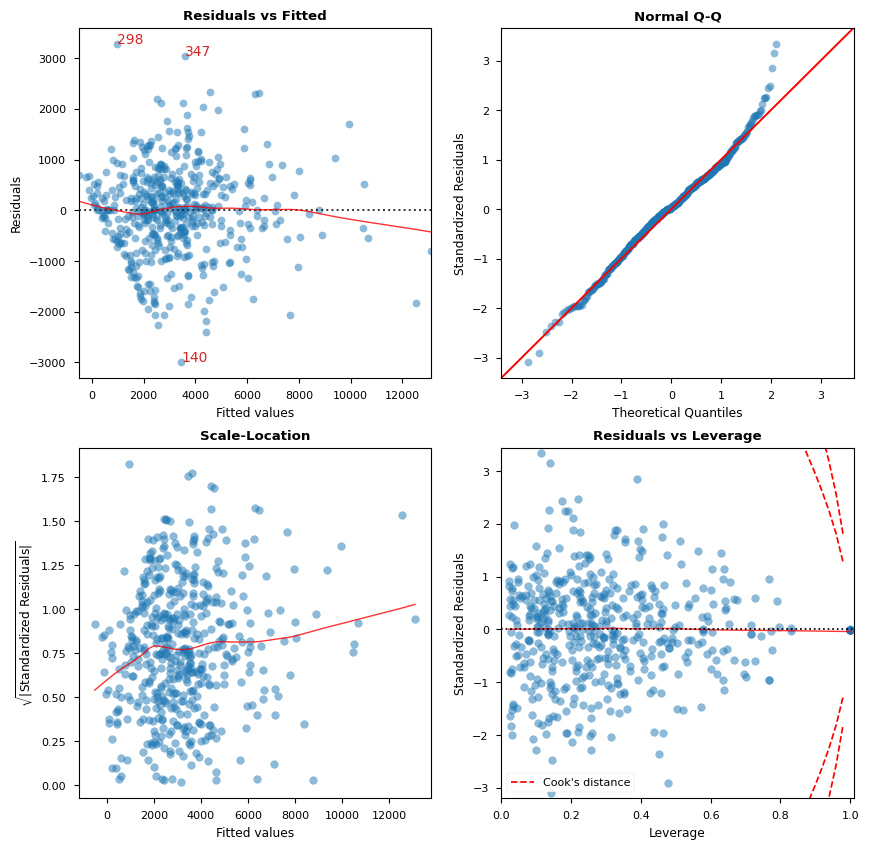

In [57]:
# Initialize TMDB model class.
mdl = tmdb_model()

cdf = data

# Generate pair plot of continuous covariates.
#sns.pairplot(cdf[['opening_revenue', 'budget', 'num_production_companies', 'runtime', 'month', 'pct_indie']])

# Generate OLS model.
Y = ['opening_revenue']
X = test_cut

cov_transform = {'opening_revenue': 'sqrt'}
# cov_transform = None

#cov_joint = [['cast_xp_sum', 'director_xp']]
cov_joint = None

_, res = mdl.get_ols_model(cdf, Y, X, cov_transform=cov_transform, cov_joint=cov_joint)

# Generate linear regression diagnostics for OLS model.
print(res.summary())

diag = tmdb_linreg(res)
vif, fig, ax = diag()

In [ ]:
# Initialize TMDB model class.
mdl = tmdb_model()

cdf = data

# Generate pair plot of continuous covariates.
sns.pairplot(cdf[['opening_revenue', 'budget', 'num_production_companies', 'runtime', 'month', 'pct_indie']])

# Generate OLS model.
Y = ['opening_revenue']
X = final_cut

cov_transform = {'opening_revenue': 'sqrt'}
# cov_transform = None

#cov_joint = [['cast_xp_sum', 'director_xp']]
cov_joint = None

_, res = mdl.get_ols_model(cdf, Y, X, cov_transform=cov_transform, cov_joint=cov_joint)

# Generate linear regression diagnostics for OLS model.
print(res.summary())

diag = tmdb_linreg(res)
vif, fig, ax = diag()